In [185]:
# To enable plotting graphs in Jupyter notebook
%matplotlib inline 
import numpy as np
import pandas as pd
from sklearn.model_selection import cross_val_score
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import GaussianNB
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import VotingClassifier
from sklearn.ensemble import BaggingClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import balanced_accuracy_score
from sklearn.ensemble import BaggingClassifier
from sklearn.tree import DecisionTreeClassifier
import matplotlib.pyplot as plt   
import seaborn as sns
from sklearn import metrics
from sklearn.metrics import accuracy_score


from sklearn.model_selection import train_test_split

In [116]:
colnames = ['age', 'sex', 'cp', 'trestpbs', 'chol', 'fbs', 'restecg', 'thalach', 'exang','oldpeak','slope','ca','thal','num']

In [117]:
df = pd.read_csv("heart_disease.data",names=colnames) 

In [118]:
df.head()

,age,sex,cp,trestpbs,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,num
0,28,1,2,130,132,0,2,185,0,0.0,?,?,?,0
1,29,1,2,120,243,0,0,160,0,0.0,?,?,?,0
2,29,1,2,140,?,0,0,170,0,0.0,?,?,?,0
3,30,0,1,170,237,0,1,170,0,0.0,?,?,6,0
4,31,0,2,100,219,0,1,150,0,0.0,?,?,?,0


#### Data Cleaning & Imputation

In [92]:
df['num'].value_counts()

0    188
1    106
Name: num, dtype: int64

In [119]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 294 entries, 0 to 293
Data columns (total 14 columns):
age         294 non-null int64
sex         294 non-null int64
cp          294 non-null int64
trestpbs    294 non-null object
chol        294 non-null object
fbs         294 non-null object
restecg     294 non-null object
thalach     294 non-null object
exang       294 non-null object
oldpeak     294 non-null float64
slope       294 non-null object
ca          294 non-null object
thal        294 non-null object
num         294 non-null int64
dtypes: float64(1), int64(4), object(9)
memory usage: 32.2+ KB


In [94]:
df.isnull().sum()

age         0
sex         0
cp          0
trestpbs    0
chol        0
fbs         0
restecg     0
thalach     0
exang       0
oldpeak     0
slope       0
ca          0
thal        0
num         0
dtype: int64

In [120]:
df['slope'].value_counts()

?    190
2     91
1     12
3      1
Name: slope, dtype: int64

In [124]:
df[df.slope!="?"].slope.mode()

0    2
dtype: object

In [133]:
df['slope'].fillna(df['slope'].mode()[0],inplace=True)
df.head()

,age,sex,cp,trestpbs,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,num
0,28,1,2,130,132,0,2,185,0,0.0,2,NaN,NaN,0
1,29,1,2,120,243,0,0,160,0,0.0,2,NaN,NaN,0
2,29,1,2,140,NaN,0,0,170,0,0.0,2,NaN,NaN,0
3,30,0,1,170,237,0,1,170,0,0.0,2,NaN,6,0
4,31,0,2,100,219,0,1,150,0,0.0,2,NaN,NaN,0


In [135]:
df['chol'].fillna(df['chol'].median(),inplace=True)
df.head()

,age,sex,cp,trestpbs,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,num
0,28,1,2,130,132,0,2,185,0,0.0,2,NaN,NaN,0
1,29,1,2,120,243,0,0,160,0,0.0,2,NaN,NaN,0
2,29,1,2,140,243,0,0,170,0,0.0,2,NaN,NaN,0
3,30,0,1,170,237,0,1,170,0,0.0,2,NaN,6,0
4,31,0,2,100,219,0,1,150,0,0.0,2,NaN,NaN,0


In [137]:
df['ca'].fillna(df['ca'].mode()[0],inplace=True)
df.head()

,age,sex,cp,trestpbs,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,num
0,28,1,2,130,132,0,2,185,0,0.0,2,0,NaN,0
1,29,1,2,120,243,0,0,160,0,0.0,2,0,NaN,0
2,29,1,2,140,243,0,0,170,0,0.0,2,0,NaN,0
3,30,0,1,170,237,0,1,170,0,0.0,2,0,6,0
4,31,0,2,100,219,0,1,150,0,0.0,2,0,NaN,0


In [138]:
df['thal'].fillna(df['thal'].mode()[0],inplace=True)
df.head()

,age,sex,cp,trestpbs,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,num
0,28,1,2,130,132,0,2,185,0,0.0,2,0,7,0
1,29,1,2,120,243,0,0,160,0,0.0,2,0,7,0
2,29,1,2,140,243,0,0,170,0,0.0,2,0,7,0
3,30,0,1,170,237,0,1,170,0,0.0,2,0,6,0
4,31,0,2,100,219,0,1,150,0,0.0,2,0,7,0


In [139]:
df.dtypes

age           int64
sex           int64
cp            int64
trestpbs     object
chol         object
fbs          object
restecg      object
thalach      object
exang        object
oldpeak     float64
slope        object
ca           object
thal         object
num           int64
dtype: object

In [78]:
df.describe()

,age,sex,cp,oldpeak,num
count,294.000000,294.000000,294.000000,294.000000,294.000000
mean,47.826531,0.724490,2.982993,0.586054,0.360544
std,7.811812,0.447533,0.965117,0.908648,0.480977
min,28.000000,0.000000,1.000000,0.000000,0.000000
25%,42.000000,0.000000,2.000000,0.000000,0.000000
50%,49.000000,1.000000,3.000000,0.000000,0.000000
75%,54.000000,1.000000,4.000000,1.000000,1.000000
max,66.000000,1.000000,4.000000,5.000000,1.000000


In [140]:
df['chol'] = df.chol.astype("float64")
df.dtypes

age           int64
sex           int64
cp            int64
trestpbs     object
chol        float64
fbs          object
restecg      object
thalach      object
exang        object
oldpeak     float64
slope        object
ca           object
thal         object
num           int64
dtype: object

In [141]:
df['sex'] = df.sex.astype("object")
df.dtypes

age           int64
sex          object
cp            int64
trestpbs     object
chol        float64
fbs          object
restecg      object
thalach      object
exang        object
oldpeak     float64
slope        object
ca           object
thal         object
num           int64
dtype: object

In [142]:
df['cp'] = df.cp.astype("object")
df.dtypes

age           int64
sex          object
cp           object
trestpbs     object
chol        float64
fbs          object
restecg      object
thalach      object
exang        object
oldpeak     float64
slope        object
ca           object
thal         object
num           int64
dtype: object

In [143]:
df['trestpbs'] = df.trestpbs.astype("float64")
df.dtypes

age           int64
sex          object
cp           object
trestpbs    float64
chol        float64
fbs          object
restecg      object
thalach      object
exang        object
oldpeak     float64
slope        object
ca           object
thal         object
num           int64
dtype: object

In [144]:
df['thalach'] = df.thalach.astype("float64")
df.dtypes

age           int64
sex          object
cp           object
trestpbs    float64
chol        float64
fbs          object
restecg      object
thalach     float64
exang        object
oldpeak     float64
slope        object
ca           object
thal         object
num           int64
dtype: object

In [157]:
df['trestpbs'].fillna(df['trestpbs'].median(),inplace=True)

In [160]:
df['fbs'].fillna(df['fbs'].mode()[0],inplace=True)

In [163]:
df['restecg'].fillna(df['restecg'].mode()[0],inplace=True)

In [165]:
df['thalach'].fillna(df['thalach'].median(),inplace=True)

In [167]:
df['exang'].fillna(df['exang'].mode()[0],inplace=True)

In [168]:
df.isnull().sum()

age         0
sex         0
cp          0
trestpbs    0
chol        0
fbs         0
restecg     0
thalach     0
exang       0
oldpeak     0
slope       0
ca          0
thal        0
num         0
dtype: int64

C:\Users\aujas\AppData\Local\Programs\Python\Python37\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval
C:\Users\aujas\AppData\Local\Programs\Python\Python37\lib\site-packages\statsmodels\nonparametric\kde.py:488: RuntimeWarning: invalid value encountered in true_divide
  binned = fast_linbin(X, a, b, gridsize) / (delta * nobs)
C:\Users\aujas\AppData\Local\Programs\Python\Python37\lib\site-packages\statsmodels\nonparametric\kdetools.py:34: RuntimeWarning: invalid value encountered in double_scalars
  FAC1 = 2*(np.pi*bw/RANGE)**2
C:\Users\aujas\AppData\Local\Programs\Python\Python37\lib\site-packages\numpy\core\fromnumeric.py:83: RuntimeWarning: invalid va

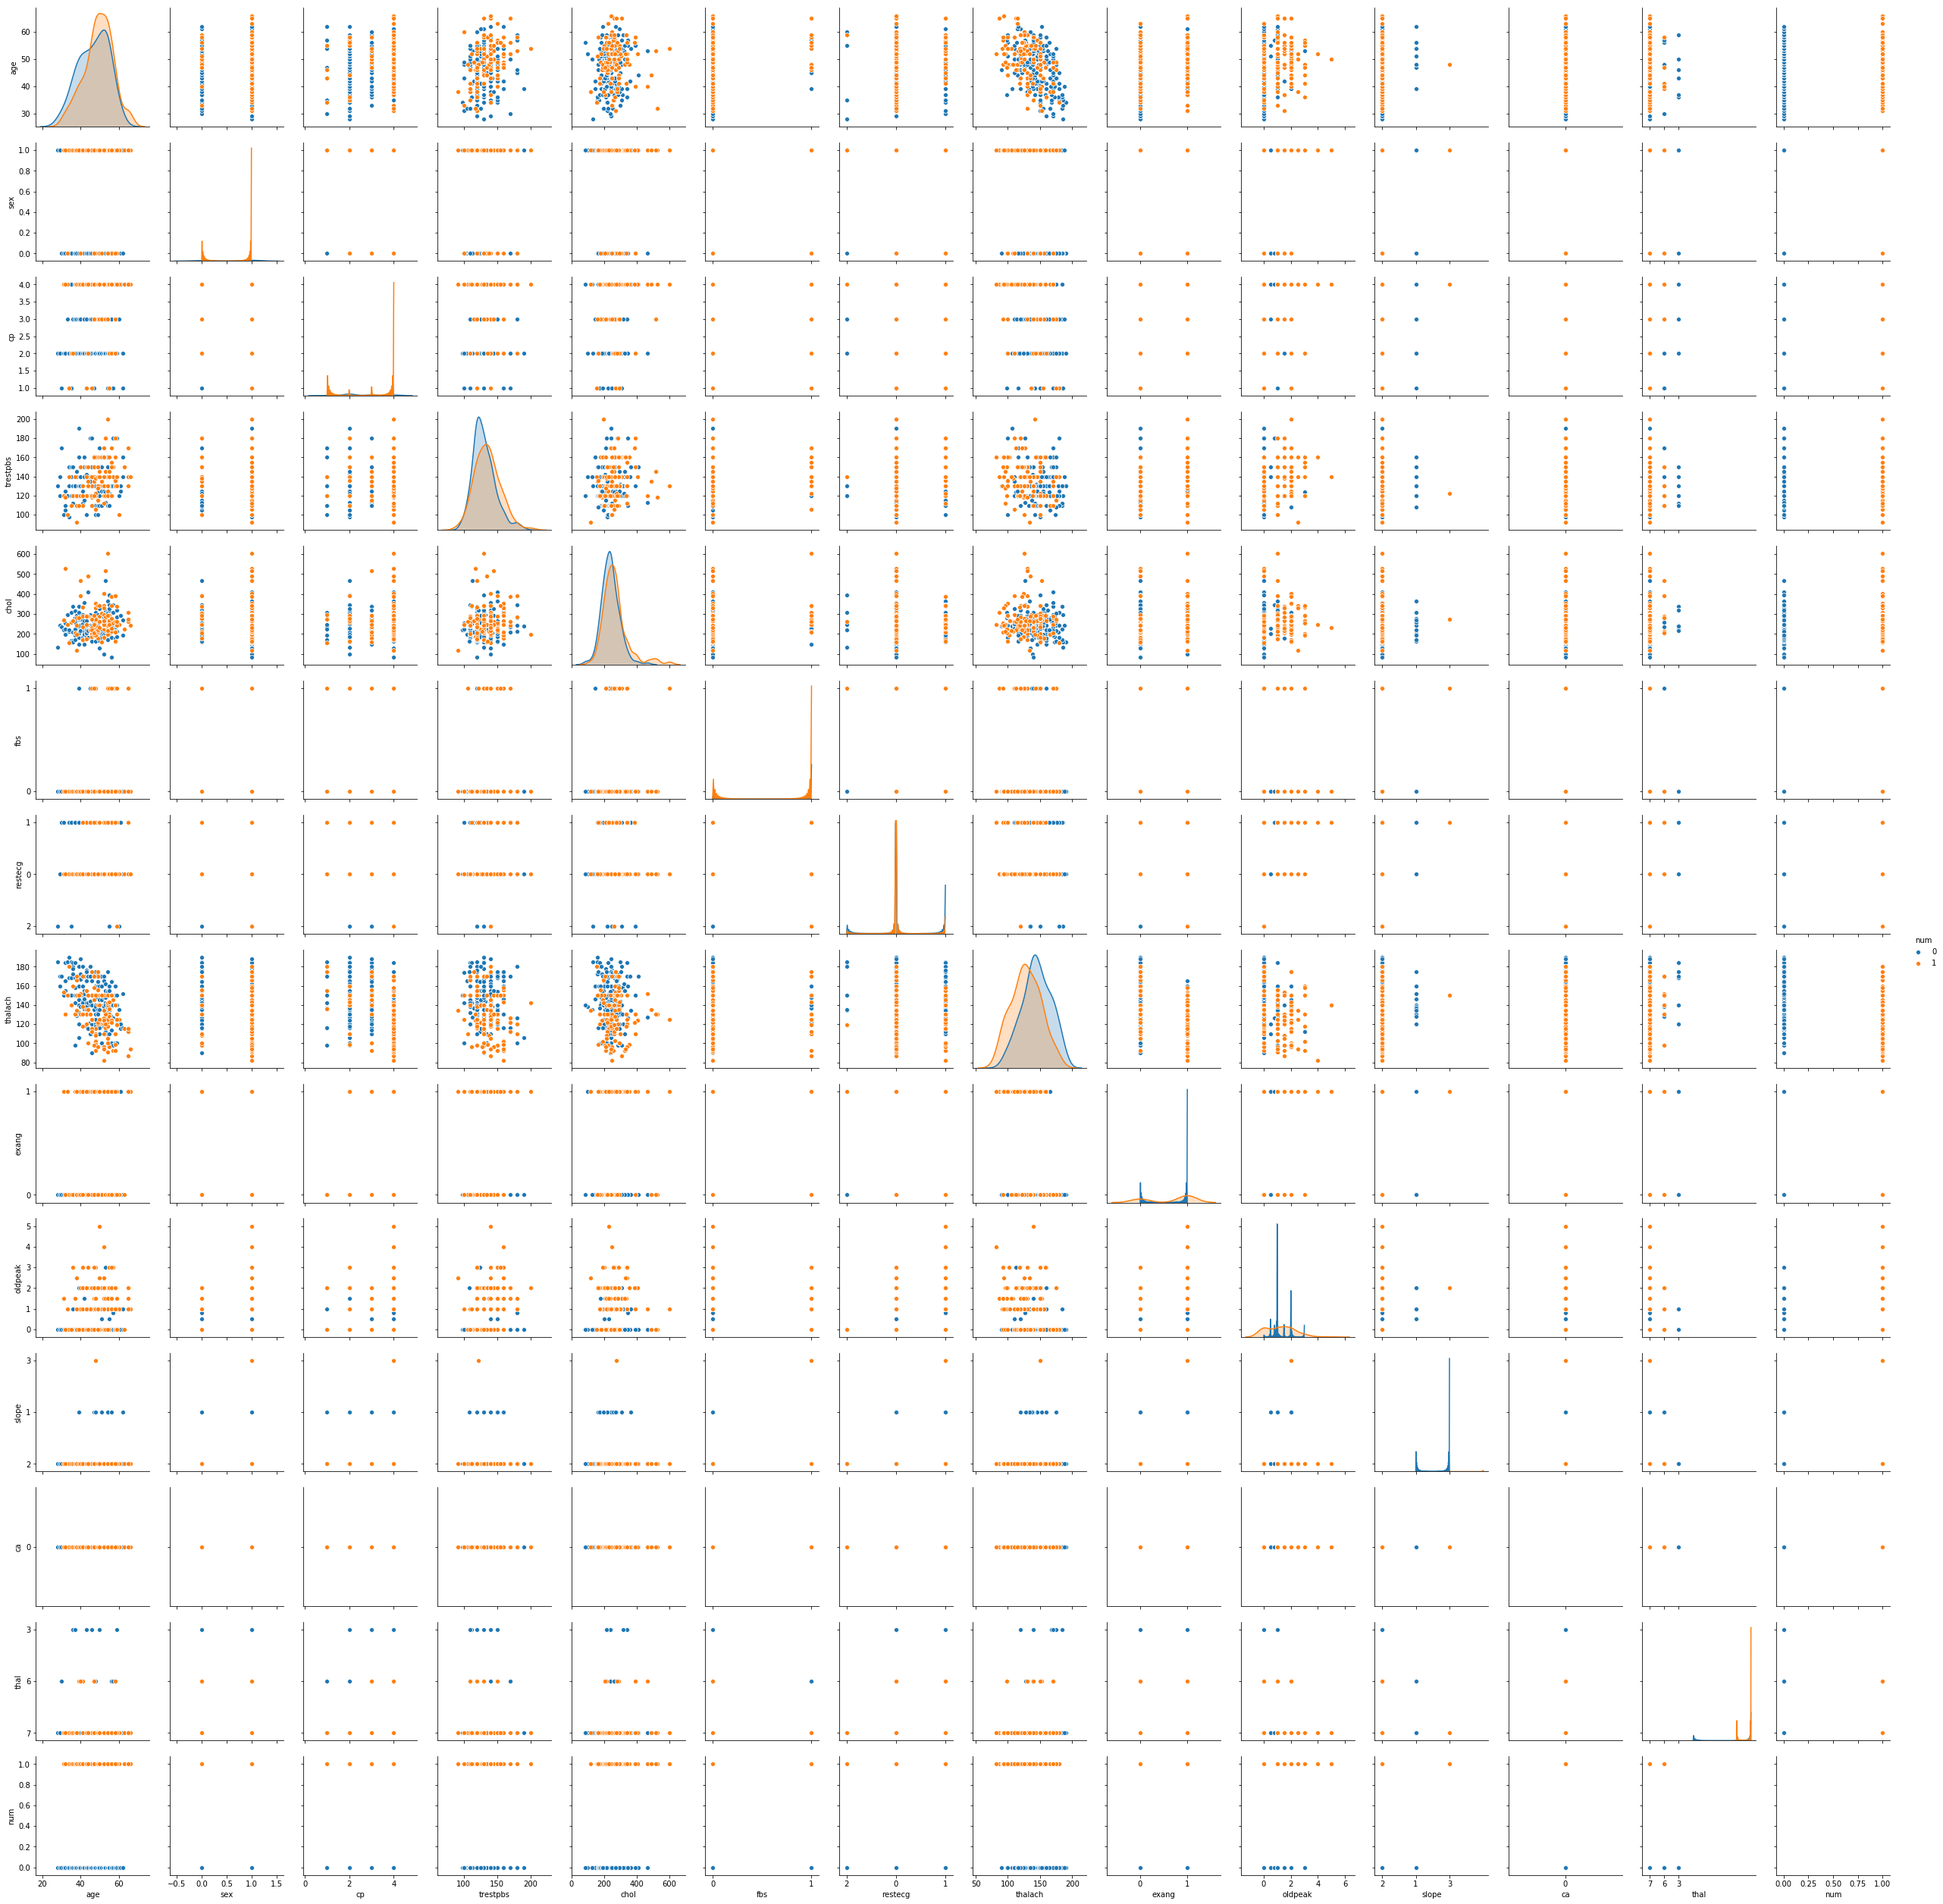

In [169]:
sns.pairplot(df,hue = 'num')

# Model Building 

#### Logistic Regression

In [177]:
X = df.drop('num', axis=1)
y = df[['num']]

In [180]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y , test_size = 0.3, random_state=1)

In [181]:
# train a logistic regression model on the training set
from sklearn.linear_model import LogisticRegression
logreg = LogisticRegression()
logreg.fit(X_train, y_train)

C:\Users\aujas\AppData\Local\Programs\Python\Python37\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\aujas\AppData\Local\Programs\Python\Python37\lib\site-packages\sklearn\utils\validation.py:761: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='warn',
          n_jobs=None, penalty='l2', random_state=None, solver='warn',
          tol=0.0001, verbose=0, warm_start=False)

In [182]:
y_pred_class = logreg.predict(X_test)

In [183]:
from sklearn import metrics
print(metrics.accuracy_score(y_test, y_pred_class))

0.8089887640449438


#### Random Forest

In [187]:
RS=RandomForestClassifier(random_state=123)
RS.fit(X_train,y_train)
pred = RS.predict(X_test)
rc=accuracy_score(y_test,pred)
from sklearn import metrics
cr=metrics.classification_report(y_test,pred)
print(cr)

              precision    recall  f1-score   support

           0       0.84      0.83      0.84        59
           1       0.68      0.70      0.69        30

   micro avg       0.79      0.79      0.79        89
   macro avg       0.76      0.77      0.76        89
weighted avg       0.79      0.79      0.79        89



C:\Users\aujas\AppData\Local\Programs\Python\Python37\lib\site-packages\sklearn\ensemble\forest.py:246: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
C:\Users\aujas\AppData\Local\Programs\Python\Python37\lib\site-packages\ipykernel_launcher.py:2: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  


#### Gaussian

In [198]:
GB=GaussianNB()
GB.fit(X_train,y_train)
pred = GB.predict(X_test)
rc=accuracy_score(y_test,pred)
from sklearn import metrics
cr=metrics.classification_report(y_test,pred)
print(cr)

              precision    recall  f1-score   support

           0       0.93      0.73      0.82        59
           1       0.63      0.90      0.74        30

   micro avg       0.79      0.79      0.79        89
   macro avg       0.78      0.81      0.78        89
weighted avg       0.83      0.79      0.79        89



C:\Users\aujas\AppData\Local\Programs\Python\Python37\lib\site-packages\sklearn\utils\validation.py:761: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


#### Baggged DT Classifier

In [189]:
from sklearn import model_selection

In [190]:
seed = 7
kfold = model_selection.KFold(n_splits=10, random_state=seed)

In [191]:
cart = DecisionTreeClassifier()

In [192]:
num_trees = 100

In [193]:
model = BaggingClassifier(base_estimator=cart, n_estimators=num_trees, random_state=seed)

In [194]:
model.fit(X_train, y_train)

C:\Users\aujas\AppData\Local\Programs\Python\Python37\lib\site-packages\sklearn\ensemble\bagging.py:621: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


BaggingClassifier(base_estimator=DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=None,
            max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, presort=False, random_state=None,
            splitter='best'),
         bootstrap=True, bootstrap_features=False, max_features=1.0,
         max_samples=1.0, n_estimators=100, n_jobs=None, oob_score=False,
         random_state=7, verbose=0, warm_start=False)

In [195]:
y_pred = model.predict(X_test) 

In [196]:
accuracy_score(y_test,y_pred)

0.7640449438202247

# Hybrid Classifier

In [204]:
dt_model = DecisionTreeClassifier(criterion = 'entropy', max_depth = 5)

In [ ]:
array = df.values
X = array[:,0:12] # select all rows and first 8 columns which are the attributes
Y = array[:,13] 

In [206]:
X_train, X_test, y_train, y_test = train_test_split(X, y , test_size = 0.3, random_state=1)

In [205]:
clf1 = LogisticRegression(random_state=1)
clf2 = RandomForestClassifier(random_state=1)
clf3 = GaussianNB()
clf4 = BaggingClassifier(base_estimator=dt_model, n_estimators=50 , random_state=1)  

print('5-fold cross validation:\n')

labels = ['Logistic Regression', 'Random Forest', 'Naive Bayes','Bagging Classifier']

for clf, label in zip([clf1, clf2, clf3, clf4], labels):

    scores = model_selection.cross_val_score(clf, X, y, 
                                              cv=5, 
                                              scoring='accuracy')
    print("Accuracy: %0.2f (+/- %0.2f) [%s]"
          % (scores.mean(), scores.std(), label))

5-fold cross validation:

Accuracy: 0.83 (+/- 0.02) [Logistic Regression]
Accuracy: 0.79 (+/- 0.07) [Random Forest]
Accuracy: 0.79 (+/- 0.09) [Naive Bayes]


C:\Users\aujas\AppData\Local\Programs\Python\Python37\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\aujas\AppData\Local\Programs\Python\Python37\lib\site-packages\sklearn\utils\validation.py:761: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\aujas\AppData\Local\Programs\Python\Python37\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\aujas\AppData\Local\Programs\Python\Python37\lib\site-packages\sklearn\utils\validation.py:761: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), fo

Accuracy: 0.72 (+/- 0.15) [Bagging Classifier]


C:\Users\aujas\AppData\Local\Programs\Python\Python37\lib\site-packages\sklearn\ensemble\bagging.py:621: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\aujas\AppData\Local\Programs\Python\Python37\lib\site-packages\sklearn\ensemble\bagging.py:621: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\aujas\AppData\Local\Programs\Python\Python37\lib\site-packages\sklearn\ensemble\bagging.py:621: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
